## Linear Reg Learning
## Company data handling

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import joblib

In [78]:
df = pd.read_csv('1000_Companies.csv')
df.drop('State', axis=1, inplace = True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [79]:
from re import X
x = x = df.drop('Profit', axis=1)
y = df.Profit

In [80]:
## Model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 42)

In [81]:
# Standardizing the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
# Implementation of Linear Regression
from sklearn.linear_model import LinearRegression
# Cross Validation
from sklearn.model_selection import cross_val_score

regression = LinearRegression()
regression.fit(X_train, y_train)

# Cross Validation Score
meanSquaredError = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
np.mean(meanSquaredError)

-229866743.6934436

In [83]:
# Making Predictions
reg_pred = regression.predict(X_test)
reg_pred

array([124501.80964392, 111453.5267196 ,  91510.58296531, 127086.45079717,
       161343.86896151,  91581.68842087, 154367.82217846, 138860.8319643 ,
        87783.97067042,  91278.41922179, 167745.07503871, 163074.38773235,
       105001.7757752 , 107890.54283706,  91764.16390504, 159578.22576613,
       116483.16813768, 104335.2691257 , 120181.50957136, 105333.31583689,
        75540.1220725 , 125506.70991846,  65247.81878329,  70075.28083698,
       170021.30684578, 164227.49577462, 177850.61930312, 135069.96787886,
       122142.47856919, 162120.88903315, 145040.15469242, 113083.81246553,
       165466.27310865, 141352.95036411,  65270.94949742,  88781.16077516,
        81937.90131719,  74143.71338607, 116470.3178208 , 169926.21406964,
        60421.21353953,  88842.84264467, 121363.74518297, 141624.52187088,
       168289.07476037, 147221.29372335, 152201.24698374, 138293.70152852,
       141460.03695236,  74416.1414979 , 114184.66232601,  62590.35875725,
       171247.23375987, 1

<Axes: xlabel='Profit', ylabel='Count'>

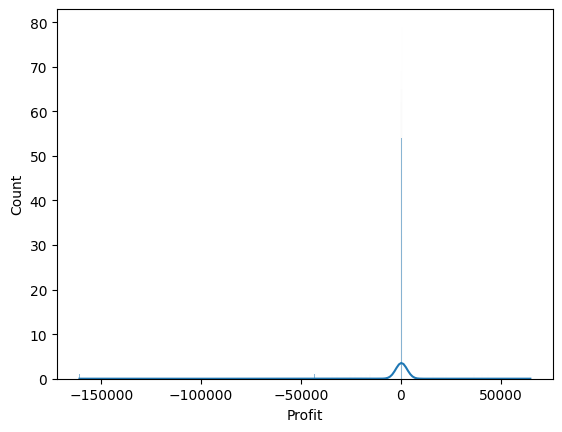

In [84]:
sns.histplot(reg_pred - y_test, kde=True)

In [89]:
# Calculating R Squared Value
from sklearn.metrics import r2_score
r2 = r2_score(y_test, reg_pred)

In [90]:
# Save the model and scaler
joblib.dump(regression, 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [91]:
# Function to predict profit based on new input factors
def predict_profit(RD_Spend, Administration, Marketing_Spend):
    # Load the model and scaler
    regression_model = joblib.load('linear_regression_model.pkl')
    scaler = joblib.load('scaler.pkl')

    # Prepare the input data
    input_data = np.array([[RD_Spend, Administration, Marketing_Spend]])
    input_data_scaled = scaler.transform(input_data)

    # Make the prediction
    predicted_profit = regression_model.predict(input_data_scaled)[0]
    return predicted_profit

In [94]:
# Example usage
RD_Spend = 150056
Administration = 126700
Marketing_Spend = 302344

predicted_profit = predict_profit(RD_Spend, Administration, Marketing_Spend)
print(f"Predicted profit is: {predicted_profit:.2f}")
print(f"Model accuracy (R-squared value): {r2:.2f}")

Predicted profit is: 170807.42
Model accuracy (R-squared value): 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
